In [1]:
# The term you are looking for to find the best choice of parameters when you have data values:
# supervised dimensionality reduction

%pylab inline
#%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import scipy.interpolate as interpolate
import scipy.integrate as integrate
import scipy.optimize as optimize

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib
matplotlib.__version__

'2.0.0rc1'

In [3]:
sys.path.insert(0, '../src')

import waveform as wave
import waveformset as ws
import trainingset as train
import taylorf2 as f2
import gaussianprocessregression as gpr
import designofexperiment as doe
#import pycbcwaveform as pycbcwave
import lalwaveform
import plotparams
import greedy
import empiricalinterpolation as eim
import surrogate
import diagnostics

import imp
imp.reload(wave)
imp.reload(ws)
imp.reload(train)
imp.reload(f2)
imp.reload(gpr)
imp.reload(doe)
#imp.reload(pycbcwave)
imp.reload(lalwaveform)
imp.reload(greedy)
imp.reload(eim)
imp.reload(surrogate)
imp.reload(diagnostics)

import constants
imp.reload(constants)
from constants import *

# Get saved waveforms

In [100]:
trainset = ws.HDF5WaveformSet('../data/dh_training_set.hdf5')
testset_rand = ws.HDF5WaveformSet('../data/dh_test_set_rand.hdf5')
testset_uni = ws.HDF5WaveformSet('../data/dh_test_set_uniform.hdf5')

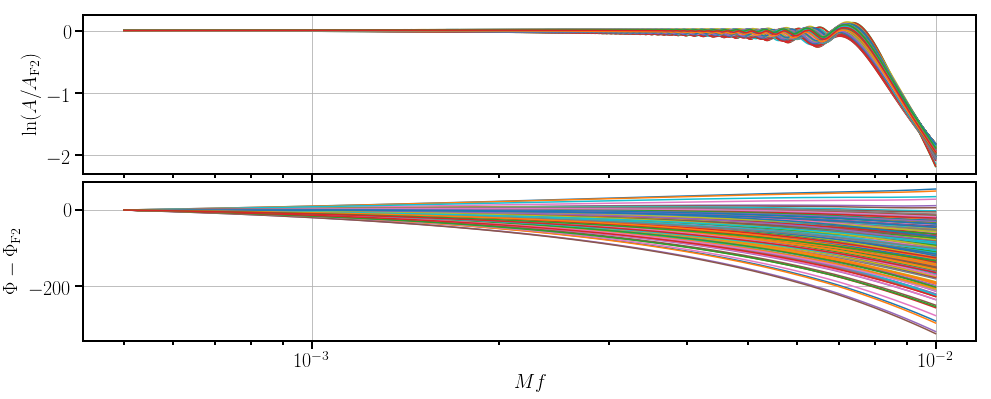

In [6]:
fig, (ax1, ax2) = wave.plot_waveforms_fd([trainset[i] for i in range(0, len(trainset), 1)])
ax1.set_ylabel(r'$\ln(A/A_{\rm F2})$')
ax2.set_ylabel(r'$\Phi-\Phi_{\rm F2}$')
ax2.set_xlabel(r'$Mf$')
ax1.grid()
ax2.grid()

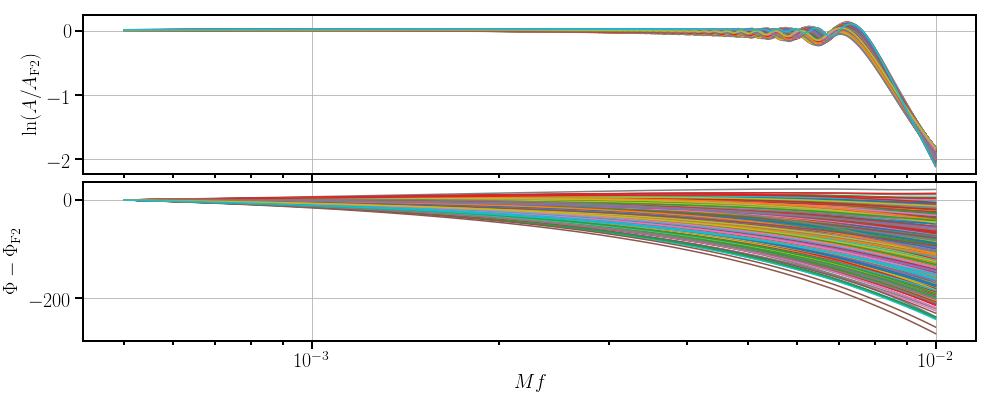

In [102]:
fig, (ax1, ax2) = wave.plot_waveforms_fd([testset_rand[i] for i in range(0, len(testset_rand), 1)])
ax1.set_ylabel(r'$\ln(A/A_{\rm F2})$')
ax2.set_ylabel(r'$\Phi-\Phi_{\rm F2}$')
ax2.set_xlabel(r'$Mf$')
ax1.grid()
ax2.grid()

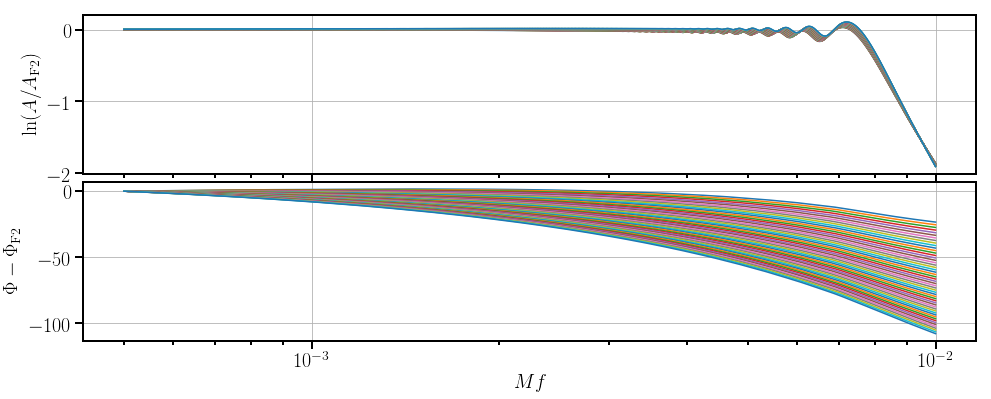

In [7]:
fig, (ax1, ax2) = wave.plot_waveforms_fd([testset_uni[i] for i in range(0, len(testset_uni), 1)])
ax1.set_ylabel(r'$\ln(A/A_{\rm F2})$')
ax2.set_ylabel(r'$\Phi-\Phi_{\rm F2}$')
ax2.set_xlabel(r'$Mf$')
ax1.grid()
ax2.grid()

# Generate reduced Bases for amplitude and phase

In [110]:
epsilon = 1.0e-6

# Initialize the ReducedBasis object
add = surrogate.add_amp
subtract = surrogate.subtract_amp
scalar_multiply = surrogate.scalar_multiply_amp
inner_product = surrogate.inner_product_amp

get_waveform = trainset.get_waveform

ts_params = trainset.parameters()
rbamprun = greedy.ReducedBasis(add, subtract, scalar_multiply, inner_product, get_waveform, ts_params)

# Standard method
rbamprun.generate_reduced_basis(epsilon, ts_istart=0, Nbases=None)

1.0
0.0278143403337
0.00772464394127
0.00404990524185
0.00111426326584
0.000875966207547
0.000475177325011
0.000292995847102
0.000127874586534
9.80832499026e-05
8.1154254744e-05
4.70110409018e-05
3.19921483973e-05
2.45468658474e-05
2.06488807688e-05
1.20684924543e-05
9.26135172141e-06
8.41717537747e-06
8.04945878707e-06
5.30862112058e-06
3.96408438275e-06
3.49874238992e-06
2.52120637523e-06
2.41415017799e-06
2.25704271939e-06
1.73786365254e-06
1.46339978424e-06
1.24636575738e-06
1.05685030594e-06
1.02317278861e-06
9.00160798012e-07


In [111]:
len(rbamprun.rb)

31

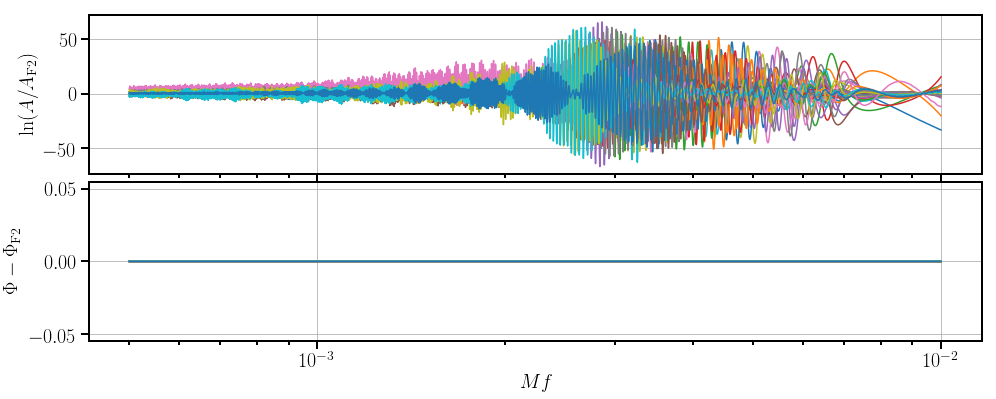

In [112]:
fig, (ax1, ax2) = wave.plot_waveforms_fd(rbamprun.rb)
ax1.set_ylabel(r'$\ln(A/A_{\rm F2})$')
ax2.set_ylabel(r'$\Phi-\Phi_{\rm F2}$')
ax2.set_xlabel(r'$Mf$')
ax1.grid()
ax2.grid()

In [113]:
epsilon = 1.0e-10

# Initialize the ReducedBasis object
add = surrogate.add_phase
subtract = surrogate.subtract_phase
scalar_multiply = surrogate.scalar_multiply_phase
inner_product = surrogate.inner_product_phase

get_waveform = trainset.get_waveform

ts_params = trainset.parameters()
rbphaserun = greedy.ReducedBasis(add, subtract, scalar_multiply, inner_product, get_waveform, ts_params)

# Standard method
rbphaserun.generate_reduced_basis(epsilon, ts_istart=0, Nbases=None)

1.0
0.983726717844
0.00763261772704
9.45914957715e-05
4.94494438807e-06
3.23217571807e-06
1.91840721941e-06
7.48476769674e-07
4.05013978133e-07
2.32962469537e-07
1.66407116642e-07
1.17522150345e-07
8.38103413336e-08
6.79176708207e-08
4.27359855282e-08
9.19029208291e-09
8.07728950392e-09
7.74508057688e-09
7.03527480717e-09
2.70188571516e-09
2.41819742008e-09
2.24713925245e-09
1.84513038182e-09
1.70416070144e-09
1.15064580086e-09
1.11553921656e-09
6.86916967751e-10
5.93080695666e-10
5.21531151598e-10
2.79919198931e-10
2.76466294302e-10
2.57192933617e-10
2.13688178263e-10
1.97563965187e-10
1.82847403885e-10
1.79312342752e-10
1.6854206919e-10
1.53049906082e-10
1.39351086226e-10
1.28209665107e-10
1.23699384069e-10
1.18806409155e-10
1.06212261208e-10
9.88210624442e-11


In [114]:
len(rbphaserun.rb)

44

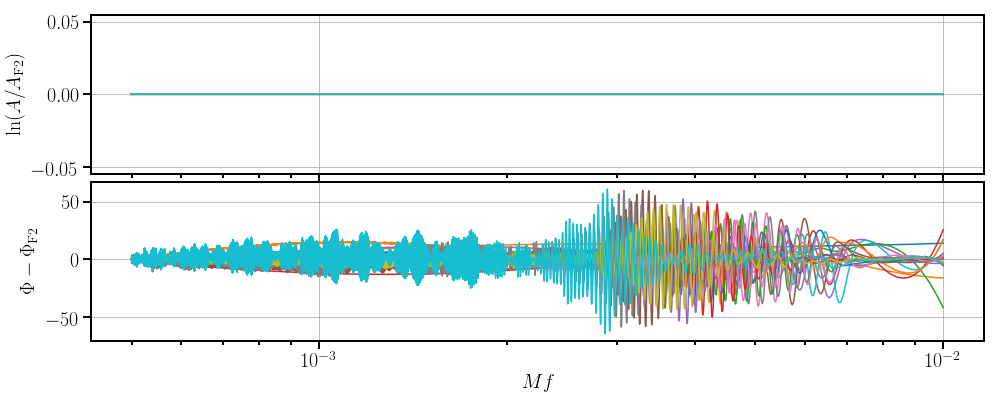

In [116]:
fig, (ax1, ax2) = wave.plot_waveforms_fd(rbphaserun.rb[:20])
ax1.set_ylabel(r'$\ln(A/A_{\rm F2})$')
ax2.set_ylabel(r'$\Phi-\Phi_{\rm F2}$')
ax2.set_xlabel(r'$Mf$')
ax1.grid()
ax2.grid()

# Generate Empirical interpolating functions

You could restrict the allowed empirical nodes to be below a certain frequency or data sample
by altering imax = np.argmax(np.abs(residual)) in the function generate_new_empirical_node to 
only allow points below some value f_max.

In [120]:
def save_empirical_interpolating_function_list(filename, b_j, mf_node):
    """Save the empirical interpolating functions as a HDF5WaveformSet object.
    """
    bset = ws.HDF5WaveformSet(filename)
    
    for j in range(len(b_j)):
        # b_j don't have waveform parameters associated with them,
        # but you do want to save the node frequency node_mf 
        parameters = np.array([mf_node[j]])
        bset.set_waveform(j, b_j[j], parameters)
    
    bset.close()

In [121]:
# Use the first 20 bases
empirical_node_indices_amp, Bamp_j = surrogate.empirical_interpolation_for_time_domain_waveform(rbamprun.rb[:20], 'amp')
empirical_node_indices_phase, Bphase_j = surrogate.empirical_interpolation_for_time_domain_waveform(rbphaserun.rb[:20], 'phase')

In [122]:
# Get the frequencies Mf at each empirical node, and sort B's by the node frequency.

# amp
mf_amp = Bamp_j[0].x[empirical_node_indices_amp]
mf_Bamp_list = [[mf_amp[i], Bamp_j[i]] for i in range(len(mf_amp))]
mf_Bamp_list_sorted = sorted(mf_Bamp_list, key=lambda x: x[0])

# phase
mf_phase = Bphase_j[0].x[empirical_node_indices_phase]
mf_Bphase_list = [[mf_phase[i], Bphase_j[i]] for i in range(len(mf_phase))]
mf_Bphase_list_sorted = sorted(mf_Bphase_list, key=lambda x: x[0])

In [123]:
filename = '../data/Bamp.hdf5'
mf = [mf_Bamp_list_sorted[i][0] for i in range(len(mf_Bamp_list_sorted))]
B_j = [mf_Bamp_list_sorted[i][1] for i in range(len(mf_Bamp_list_sorted))]
save_empirical_interpolating_function_list(filename, B_j, mf)

filename = '../data/Bphase.hdf5'
mf = [mf_Bphase_list_sorted[i][0] for i in range(len(mf_Bphase_list_sorted))]
B_j = [mf_Bphase_list_sorted[i][1] for i in range(len(mf_Bphase_list_sorted))]
save_empirical_interpolating_function_list(filename, B_j, mf)

In [124]:
# Now load them
Bamp_j = ws.HDF5WaveformSet('../data/Bamp.hdf5')
Bphase_j = ws.HDF5WaveformSet('../data/Bphase.hdf5')

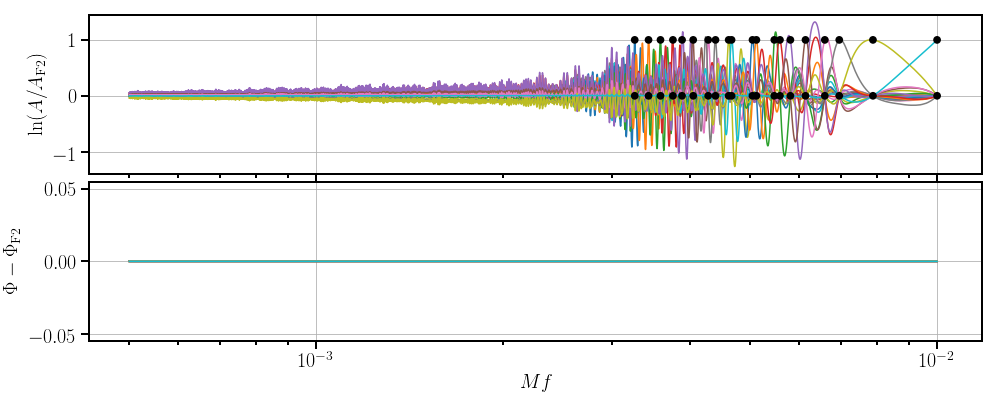

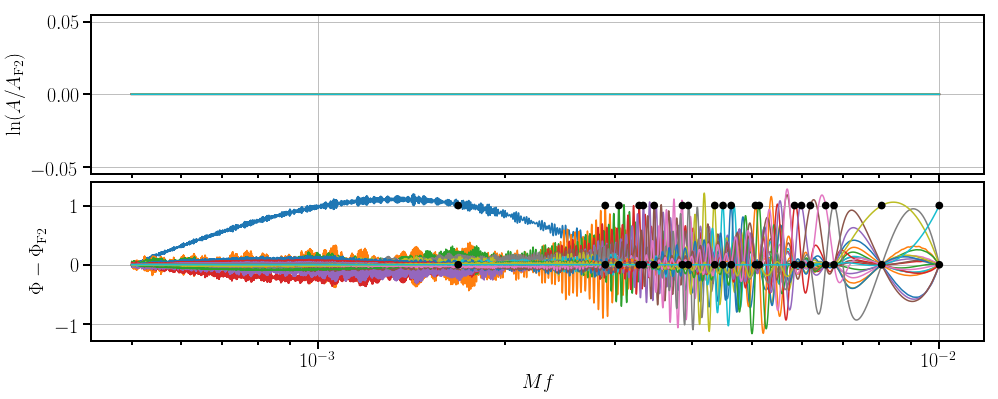

In [125]:
hs = [Bamp_j[j] for j in range(len(Bamp_j))]
mfs = np.array([Bamp_j.get_waveform(j, data='parameters')[0] for j in range(len(Bamp_j))])
fig, (ax1, ax2) = wave.plot_waveforms_fd(hs)
# zorder is order in which figure is drawn (placed on top of previous figures)
ax1.scatter(mfs, 0*mfs, marker='o', c='k', s=60, edgecolor='none', zorder=100)
ax1.scatter(mfs, 0*mfs+1, marker='o', c='k', s=60, edgecolor='none', zorder=100)

ax1.set_ylabel(r'$\ln(A/A_{\rm F2})$')
ax2.set_ylabel(r'$\Phi-\Phi_{\rm F2}$')
ax2.set_xlabel(r'$Mf$')
ax1.grid()
ax2.grid()

hs = [Bphase_j[j] for j in range(len(Bphase_j))]
mfs = np.array([Bphase_j.get_waveform(j, data='parameters')[0] for j in range(len(Bphase_j))])
fig, (ax1, ax2) = wave.plot_waveforms_fd(hs)
# zorder is order in which figure is drawn (placed on top of previous figures)
ax2.scatter(mfs, 0*mfs, marker='o', c='k', s=60, edgecolor='none', zorder=100)
ax2.scatter(mfs, 0*mfs+1, marker='o', c='k', s=60, edgecolor='none', zorder=100)

ax1.set_ylabel(r'$\ln(A/A_{\rm F2})$')
ax2.set_ylabel(r'$\Phi-\Phi_{\rm F2}$')
ax2.set_xlabel(r'$Mf$')
ax1.grid()
ax2.grid()

# Generate Gaussian processes

In [126]:
# Calculate the amplitude for all waveforms in the training set
# at the amplitude empirical nodes
damp_ts_list = []
for j in range(len(Bamp_j)):
    mf = Bamp_j.get_waveform(j, data='parameters')[0]
    damp_ts = np.array([trainset[i].interpolate('amp')(mf) for i in range(len(trainset))])
    damp_ts_list.append(damp_ts)
    
# Calculate the phase for all waveforms in the training set
# at the phase empirical nodes
dphase_ts_list = []
for j in range(len(Bphase_j)):
    mf = Bphase_j.get_waveform(j, data='parameters')[0]
    dphase_ts = np.array([trainset[i].interpolate('phase')(mf) for i in range(len(trainset))])
    dphase_ts_list.append(dphase_ts)
    
# Relevant parameters for the training set waveforms
params_ts = trainset.parameters()

In [127]:
limits = np.array([[1.0/3.0, 1.0], [-0.7, 0.7], [-0.7, 0.7], [0, 10000], [0, 10000]])
kernel_type = 'matern52'

damp_gp_list = []
for i in range(len(damp_ts_list)):
    print i
    points = params_ts
    data = damp_ts_list[i]
    hp0, hyper_limits = gpr.reasonable_hyperparameters_range(data, limits)
    damp_gp = gpr.generate_gp(points, data, hp0, kernel_type=kernel_type, 
                                hyper_limits=hyper_limits, n_restarts_optimizer=9)
    #print hp0
    print hyper_limits
    #print damp_gp.kernel_
    print gpr.get_hyperparameters(damp_gp)
    damp_gp_list.append(damp_gp)

0
[[  4.18995689e-03   1.67598276e-01]
 [  6.66666667e-02   2.66666667e+00]
 [  1.40000000e-01   5.60000000e+00]
 [  1.40000000e-01   5.60000000e+00]
 [  1.00000000e+03   4.00000000e+04]
 [  1.00000000e+03   4.00000000e+04]
 [  4.18995689e-07   4.18995689e-03]]
[  3.02241527e-02   1.48256334e+00   3.75910093e+00   5.39350778e+00
   4.00000000e+04   4.00000000e+04   1.63098999e-03]
1
[[  5.37920274e-03   2.15168110e-01]
 [  6.66666667e-02   2.66666667e+00]
 [  1.40000000e-01   5.60000000e+00]
 [  1.40000000e-01   5.60000000e+00]
 [  1.00000000e+03   4.00000000e+04]
 [  1.00000000e+03   4.00000000e+04]
 [  5.37920274e-07   5.37920274e-03]]
[  3.58252903e-02   1.69588595e+00   3.55372137e+00   5.44356139e+00
   4.00000000e+04   4.00000000e+04   2.13088886e-03]
2
[[  5.91367087e-03   2.36546835e-01]
 [  6.66666667e-02   2.66666667e+00]
 [  1.40000000e-01   5.60000000e+00]
 [  1.40000000e-01   5.60000000e+00]
 [  1.00000000e+03   4.00000000e+04]
 [  1.00000000e+03   4.00000000e+04]
 [  5.91

In [143]:
limits = np.array([[1.0/3.0, 1.0], [-0.7, 0.7], [-0.7, 0.7], [0, 10000], [0, 10000]])
kernel_type = 'matern52'

dphase_gp_list = []
for i in range(len(dphase_ts_list)):
    print i
    points = params_ts
    data = dphase_ts_list[i]
    hp0, hyper_limits = gpr.reasonable_hyperparameters_range(data, limits, sigma_n_factor=[1.0e-6, 0.1])
#     hp0, hyper_limits = gpr.reasonable_hyperparameters_range(data, limits, 
#                                                              sigma_f_factor=[0.1, 10.0], 
#                                                              sigma_n_factor=[1.0e-5, 0.1], 
#                                                              length_scale_factor=[0.1, 10.0])
    dphase_gp = gpr.generate_gp(points, data, hp0, kernel_type=kernel_type, 
                                hyper_limits=hyper_limits, n_restarts_optimizer=9)
    #print hp0
    print hyper_limits
    #print dphase_gp.kernel_
    print gpr.get_hyperparameters(dphase_gp)
    dphase_gp_list.append(dphase_gp)

0
[[  4.46150789e+00   1.78460316e+02]
 [  6.66666667e-02   2.66666667e+00]
 [  1.40000000e-01   5.60000000e+00]
 [  1.40000000e-01   5.60000000e+00]
 [  1.00000000e+03   4.00000000e+04]
 [  1.00000000e+03   4.00000000e+04]
 [  4.46150789e-05   4.46150789e+00]]
[  1.07370066e+01   9.33105266e-01   3.72188581e+00   5.60000000e+00
   4.00000000e+04   4.00000000e+04   4.46150789e-05]
1
[[  8.65098283e+00   3.46039313e+02]
 [  6.66666667e-02   2.66666667e+00]
 [  1.40000000e-01   5.60000000e+00]
 [  1.40000000e-01   5.60000000e+00]
 [  1.00000000e+03   4.00000000e+04]
 [  1.00000000e+03   4.00000000e+04]
 [  8.65098283e-05   8.65098283e+00]]
[  2.00846850e+01   9.11922649e-01   4.13610279e+00   5.60000000e+00
   4.00000000e+04   4.00000000e+04   8.65098283e-05]
2
[[  9.15665015e+00   3.66266006e+02]
 [  6.66666667e-02   2.66666667e+00]
 [  1.40000000e-01   5.60000000e+00]
 [  1.40000000e-01   5.60000000e+00]
 [  1.00000000e+03   4.00000000e+04]
 [  1.00000000e+03   4.00000000e+04]
 [  9.15

/Users/lackey/Library/Python/2.7/lib/python/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -1.17984295e-04,   3.55522710e-04,   1.51309374e-04,
        -1.90917123e+02,  -8.23318277e+01,  -2.45516914e+02,
         5.85499677e-04]), 'nit': 29, 'funcalls': 77}
  " state: %s" % convergence_dict)


[[  9.95311213e+00   3.98124485e+02]
 [  6.66666667e-02   2.66666667e+00]
 [  1.40000000e-01   5.60000000e+00]
 [  1.40000000e-01   5.60000000e+00]
 [  1.00000000e+03   4.00000000e+04]
 [  1.00000000e+03   4.00000000e+04]
 [  9.95311213e-05   9.95311213e+00]]
[  2.29354065e+01   9.06946427e-01   4.25356256e+00   5.60000000e+00
   4.00000000e+04   4.00000000e+04   9.95311213e-05]
4
[[  1.01185708e+01   4.04742834e+02]
 [  6.66666667e-02   2.66666667e+00]
 [  1.40000000e-01   5.60000000e+00]
 [  1.40000000e-01   5.60000000e+00]
 [  1.00000000e+03   4.00000000e+04]
 [  1.00000000e+03   4.00000000e+04]
 [  1.01185708e-04   1.01185708e+01]]
[  2.33103282e+01   9.06640850e-01   4.26917964e+00   5.60000000e+00
   4.00000000e+04   4.00000000e+04   1.01185708e-04]
5


/Users/lackey/Library/Python/2.7/lib/python/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  4.15115923e-04,  -5.12700934e-04,  -1.35254356e-03,
        -1.92772630e+02,  -8.00256105e+01,  -2.45880827e+02,
         5.92712804e-04]), 'nit': 32, 'funcalls': 81}
  " state: %s" % convergence_dict)


[[  1.05807527e+01   4.23230108e+02]
 [  6.66666667e-02   2.66666667e+00]
 [  1.40000000e-01   5.60000000e+00]
 [  1.40000000e-01   5.60000000e+00]
 [  1.00000000e+03   4.00000000e+04]
 [  1.00000000e+03   4.00000000e+04]
 [  1.05807527e-04   1.05807527e+01]]
[  2.43245187e+01   9.05723673e-01   4.30871371e+00   5.60000000e+00
   4.00000000e+04   4.00000000e+04   1.05807527e-04]
6
[[  1.18553941e+01   4.74215762e+02]
 [  6.66666667e-02   2.66666667e+00]
 [  1.40000000e-01   5.60000000e+00]
 [  1.40000000e-01   5.60000000e+00]
 [  1.00000000e+03   4.00000000e+04]
 [  1.00000000e+03   4.00000000e+04]
 [  1.18553941e-04   1.18553941e+01]]
[  2.71047041e+01   9.01383787e-01   4.41816166e+00   5.60000000e+00
   4.00000000e+04   4.00000000e+04   1.18553941e-04]
7
[[  1.21336058e+01   4.85344233e+02]
 [  6.66666667e-02   2.66666667e+00]
 [  1.40000000e-01   5.60000000e+00]
 [  1.40000000e-01   5.60000000e+00]
 [  1.00000000e+03   4.00000000e+04]
 [  1.00000000e+03   4.00000000e+04]
 [  1.2133

/Users/lackey/Library/Python/2.7/lib/python/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  1.14391194e-04,  -2.33841555e-04,  -1.39199566e-04,
        -2.03383902e+02,  -6.92443066e+01,  -2.48050777e+02,
         6.44692238e-04]), 'nit': 31, 'funcalls': 77}
  " state: %s" % convergence_dict)
/Users/lackey/Library/Python/2.7/lib/python/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  2.72370526e-05,  -1.61085567e-04,  -6.74466725e-05,
        -2.03383885e+02,  -6.92442459e+01,  -2.48050780e+02,
         6.44692427e-04]), 'nit': 29, 'funcalls': 74}
  " state: %s" % convergence_dict)
/Users/lackey/Library/Python/2.7/lib/python/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b te

[[  1.43763642e+01   5.75054567e+02]
 [  6.66666667e-02   2.66666667e+00]
 [  1.40000000e-01   5.60000000e+00]
 [  1.40000000e-01   5.60000000e+00]
 [  1.00000000e+03   4.00000000e+04]
 [  1.00000000e+03   4.00000000e+04]
 [  1.43763642e-04   1.43763642e+01]]
[  3.26321848e+01   8.96338879e-01   4.63641014e+00   5.60000000e+00
   4.00000000e+04   4.00000000e+04   1.43763642e-04]
11
[[  1.58104279e+01   6.32417115e+02]
 [  6.66666667e-02   2.66666667e+00]
 [  1.40000000e-01   5.60000000e+00]
 [  1.40000000e-01   5.60000000e+00]
 [  1.00000000e+03   4.00000000e+04]
 [  1.00000000e+03   4.00000000e+04]
 [  1.58104279e-04   1.58104279e+01]]
[  3.57292240e+01   8.92062232e-01   4.76424009e+00   5.60000000e+00
   4.00000000e+04   4.00000000e+04   1.58104279e-04]
12
[[  1.60475005e+01   6.41900020e+02]
 [  6.66666667e-02   2.66666667e+00]
 [  1.40000000e-01   5.60000000e+00]
 [  1.40000000e-01   5.60000000e+00]
 [  1.00000000e+03   4.00000000e+04]
 [  1.00000000e+03   4.00000000e+04]
 [  1.60

In [144]:
filename = '../data/amp_gp.hdf5'
gp_list = damp_gp_list
kernel_type = 'matern52'
gpr.save_gaussian_process_regression_list(filename, gp_list, kernel_type)

filename = '../data/phase_gp.hdf5'
gp_list = dphase_gp_list
kernel_type = 'matern52'
gpr.save_gaussian_process_regression_list(filename, gp_list, kernel_type)

# Diagnosing GP fit

In [145]:
def symlog_yticks(axes):
    decade = np.array([0.1*i for i in range(10)])
    ticks = []
    for i in range(-1, 2):
        ticks.append(decade*10**i)
    ticks = np.concatenate(np.array(ticks))
    ticks_rev = np.flip(ticks, 0)
    all_ticks = np.concatenate((-ticks_rev, ticks)) 
    axes.set_yticks(all_ticks, minor=True)
    #axes.set_yticks(all_ticks)

[  6.00000000e-01  -7.00000000e-01   2.00000000e-01   2.00000000e+03
   1.00000000e+03]


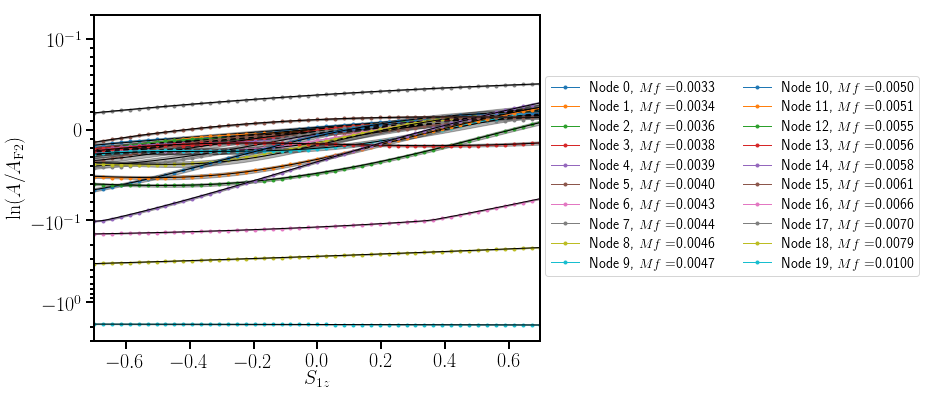

In [146]:
params_test = testset_uni.parameters()
print params_test[0]

fig, axes = plt.subplots(1, figsize=(8, 6))
for j in range(len(damp_gp_list)):
    # Node frequency
    mf = Bamp_j.get_waveform(j, data='parameters')[0]
    
    # Values at node mf for test set and GP prediction/error
    damp_test = np.array([testset_uni[i].interpolate('amp')(mf) for i in range(len(testset_uni))])
    damp_gp = damp_gp_list[j]
    damp_gp_eval, damp_gp_eval_err = damp_gp.predict(params_test, return_std=True)
    
    axes.plot(params_test[:, 1], damp_test, 'o', ls='-', lw=1, ms=3,
             label='Node {}, $Mf=${:.4f}'.format(j, mf))
    axes.plot(params_test[:, 1], damp_gp_eval, ls='-', lw=1, c='k')
    axes.fill_between(params_test[:, 1], damp_gp_eval-damp_gp_eval_err, damp_gp_eval+damp_gp_eval_err, 
                      color='k', alpha=0.3)

axes.set_yscale('symlog', linthreshy=0.1)
#axes.set_yticks(ticks, minor=True)
symlog_yticks(axes)
axes.set_ylim(-3, 0.2)
axes.set_xlim(-0.7, 0.7)
axes.set_ylim()
axes.set_ylabel(r'$\ln(A/A_{\rm F2})$')
axes.set_xlabel(r'$S_{1z}$')
axes.legend(loc=(1.01, 0.2), ncol=2)

[  6.00000000e-01  -7.00000000e-01   2.00000000e-01   2.00000000e+03
   1.00000000e+03]


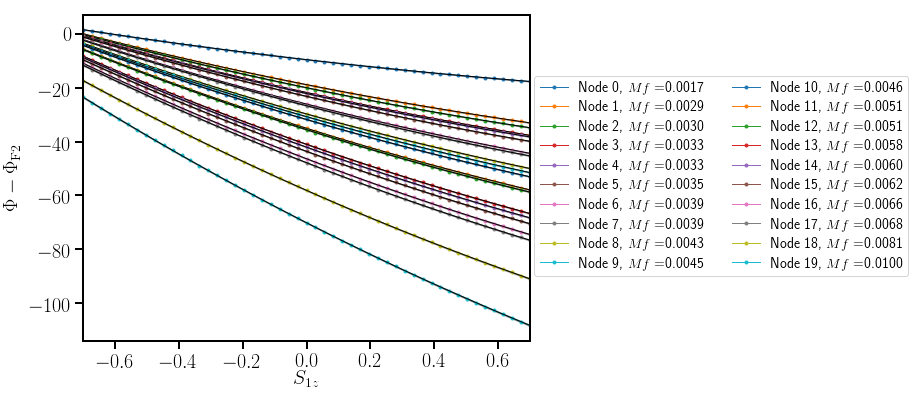

In [147]:
params_test = testset_uni.parameters()
print params_test[0]

fig, axes = plt.subplots(1, figsize=(8, 6))
for j in range(len(dphase_gp_list)):
    # Node frequency
    mf = Bphase_j.get_waveform(j, data='parameters')[0]
    
    # Values at node mf for test set and GP prediction/error
    dphase_test = np.array([testset_uni[i].interpolate('phase')(mf) for i in range(len(testset_uni))])
    dphase_gp = dphase_gp_list[j]
    dphase_gp_eval, dphase_gp_eval_err = dphase_gp.predict(params_test, return_std=True)
    
    axes.plot(params_test[:, 1], dphase_test, 'o', ls='-', lw=1, ms=3,
             label='Node {}, $Mf=${:.4f}'.format(j, mf))
    axes.plot(params_test[:, 1], dphase_gp_eval, ls='-', lw=1, c='k')
    axes.fill_between(params_test[:, 1], dphase_gp_eval-dphase_gp_eval_err, dphase_gp_eval+dphase_gp_eval_err, 
                      color='k', alpha=0.3)

axes.set_xlim(-0.7, 0.7)
axes.set_ylim()
axes.set_ylabel(r'$\Phi-\Phi_{\rm F2}$')
axes.set_xlabel(r'$S_{1z}$')
axes.legend(loc=(1.01, 0.2), ncol=2)

In [148]:
def fractional_amp_error(dlnamp_sur, dlnamp_true):
    """Calculate A_sur/A_true-1 given dlnA_sur and dlnA_true,
    where dlnA_sur = lnA_sur-lnA_ref and dlnA_true = lnA_true-lnA_ref.
    """
    error = np.exp(dlnamp_sur-dlnamp_true)-1.0
    return np.max(np.abs(error))

def phase_error(dphase_sur, dphase_true):
    """Calculate Phi_sur-Phi_true given dPhi_sur and dPhi_true,
    where dPhi_sur = Phi_sur-Phi_ref and Phi_true = Phi_true-Phi_ref.
    """
    error = dphase_sur-dphase_true
    return np.max(np.abs(error))

In [149]:
params_rand = []
amp_err = []
phase_err = []
for i in range(len(testset_rand)):
    hrand = testset_rand[i]
    params = testset_rand.get_waveform(i, data='parameters')
    hsur = surrogate.reconstruct_amp_phase_difference(params, Bamp_j, Bphase_j, damp_gp_list, dphase_gp_list)
    
    mfhigh = 0.020
    dlnamp_sur = hsur.amp[hsur.x<=mfhigh]
    dlnamp_true = hrand.amp[hrand.x<=mfhigh]
    dphase_sur = hsur.phase[hsur.x<=mfhigh]
    dphase_true = hrand.phase[hrand.x<=mfhigh]
    
    ae = fractional_amp_error(dlnamp_sur, dlnamp_true)
    pe = phase_error(dphase_sur, dphase_true)
    
    params_rand.append(params)
    amp_err.append(ae)
    phase_err.append(pe)

In [150]:
np.max(amp_err), np.max(phase_err)

(0.027987663792280015, 1.3002808795054115)

In [151]:
i_ampmax = np.array(amp_err).argmax()
i_phasemax = np.array(phase_err).argmax()

In [152]:
params_rand[i_ampmax], params_rand[i_phasemax]

(array([  7.80645276e-01,  -5.53056983e-01,  -6.34848146e-01,
          7.74212883e+03,   9.64382217e+03]),
 array([  3.99588848e-01,  -6.34782032e-01,  -5.05633045e-01,
          6.71246151e+02,   6.99529339e+02]))

[  3.99588848e-01  -6.34782032e-01  -5.05633045e-01   6.71246151e+02
   6.99529339e+02]


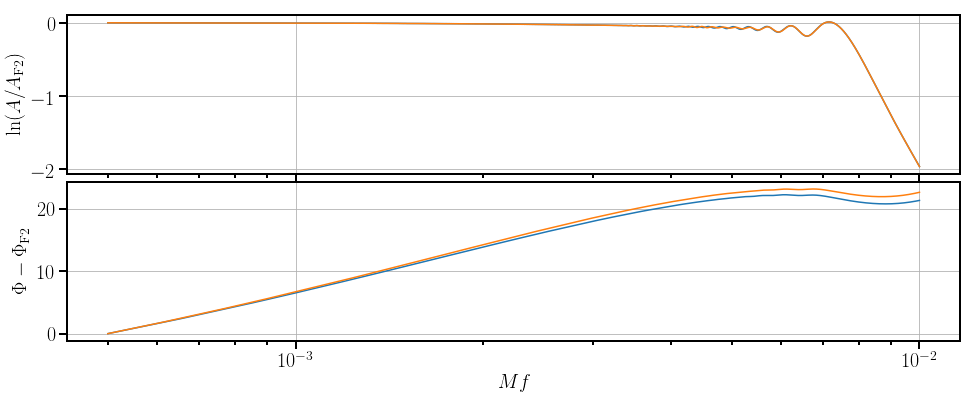

In [238]:
#i = i_ampmax
i = i_phasemax

hrand = testset_rand[i]
params = testset_rand.get_waveform(i, data='parameters')
print params
hsur = surrogate.reconstruct_amp_phase_difference(params, Bamp_j, Bphase_j, damp_gp_list, dphase_gp_list)

# Plot h_true and h_sur
fig, (ax1, ax2) = wave.plot_waveforms_fd([hrand, hsur])
ax1.set_ylabel(r'$\ln(A/A_{\rm F2})$')
ax2.set_ylabel(r'$\Phi-\Phi_{\rm F2}$')
ax2.set_xlabel(r'$Mf$')
ax1.grid()
ax2.grid()

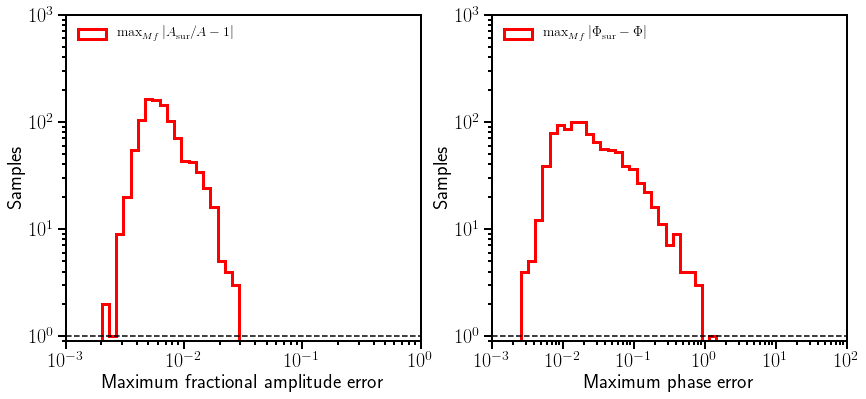

In [155]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.hist(amp_err, bins=np.logspace(-3, 0, 50), histtype='step', 
          ls='-', lw=3, color='red', alpha=1.0, label=r'$\max_{Mf}|A_{\rm sur}/A-1|$')
ax1.axhline(1.0, c='k', ls='--')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim([1.0e-3, 1.0])
ax1.set_ylim([0.9, 1000])
ax1.set_xlabel('Maximum fractional amplitude error')
ax1.set_ylabel('Samples')
ax1.legend(loc='upper left', frameon=False)

ax2.hist(phase_err, bins=np.logspace(-3, 2, 50), histtype='step', 
          ls='-', lw=3, color='red', alpha=1.0, label=r'$\max_{Mf}|\Phi_{\rm sur}-\Phi|$')
ax2.axhline(1.0, c='k', ls='--')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlim([1.0e-3, 100.0])
ax2.set_ylim([0.9, 1000])
ax2.set_xlabel('Maximum phase error')
ax2.set_ylabel('Samples')
ax2.legend(loc='upper left', frameon=False)

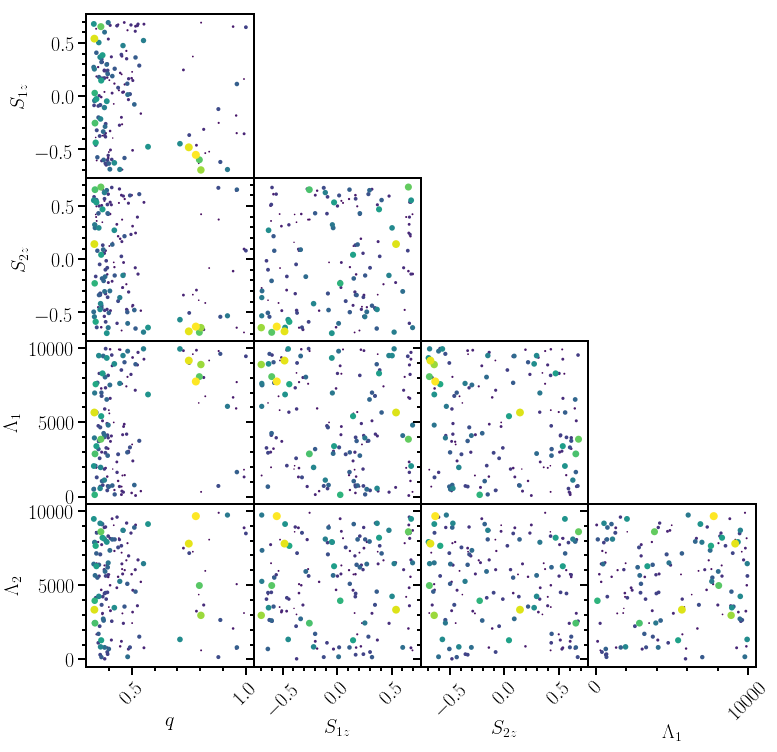

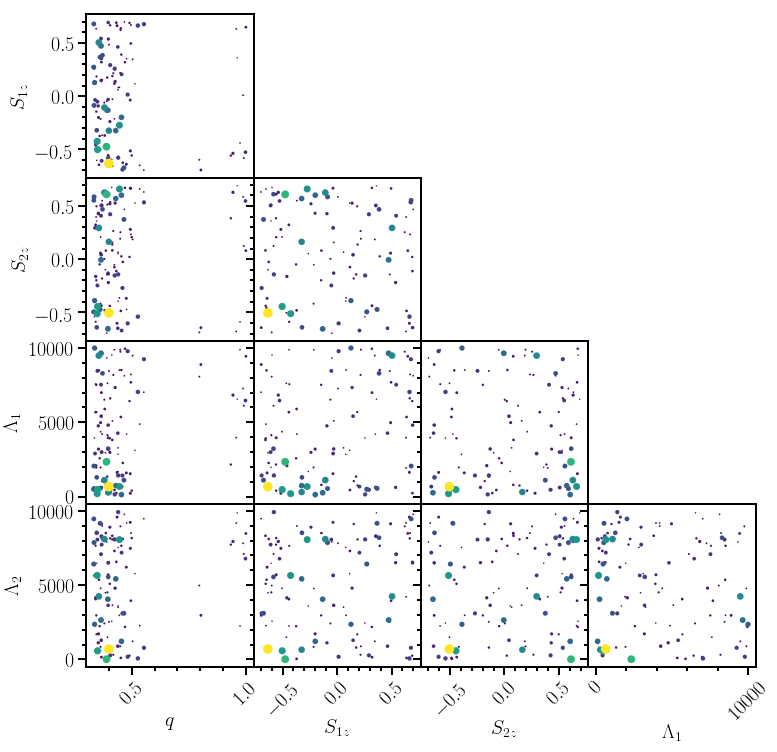

In [166]:
labels = [r'$q$', r'$S_{1z}$', r'$S_{2z}$', r'$\Lambda_1$', r'$\Lambda_2$']
params = params_rand

error = np.array(amp_err)
#print len(error[error>=0.1])
fig, ax = diagnostics.error_2d_triangle_plot(params, error, labels, threshold=0.01, figsize=(10, 10))

error = phase_err
#print len(error[error>=1.0])
fig, ax = diagnostics.error_2d_triangle_plot(params, error, labels, threshold=0.1, figsize=(10, 10))

# Plot frequency dependent error estimates

In [167]:
Bamp_filename = '../data/Bamp.hdf5'
Bphase_filename = '../data/Bphase.hdf5'
damp_gp_filename = '../data/amp_gp.hdf5'
dphase_gp_filename = '../data/phase_gp.hdf5'

Bamp = ws.HDF5WaveformSet(Bamp_filename)
Bphase = ws.HDF5WaveformSet(Bphase_filename)
damp_gp_list = gpr.load_gaussian_process_regression_list(damp_gp_filename)
dphase_gp_list = gpr.load_gaussian_process_regression_list(dphase_gp_filename)

In [168]:
def error_of_frequency(point, B_j, gp_list, data='amp'):
    jmax = len(B_j)
    eps_f_j = np.array([gp_list[j].predict(np.atleast_2d(point), return_std=True)[1][0] 
                        for j in range(jmax)])
    
    # Get complex version of B_j's in array form
    if data=='amp':
        B_j_array = np.array([B_j[j].amp for j in range(jmax)])
    elif data=='phase':
        B_j_array = np.array([B_j[j].phase for j in range(jmax)])
    else:
        raise Exception

    # Evaluate waveform
    error_arr = np.dot(eps_f_j, B_j_array)

    # Rewrite as TimeDomainWaveform
    xarr = B_j[0].x
    return xarr, error_arr

In [177]:
point = np.array([0.8, 0.3, 0.7, 3455, 2579])
f, eps = error_of_frequency(point, Bamp, damp_gp_list, data='amp')
#f, eps = error_of_frequency(point, Bphase, dphase_gp_list, data='phase')

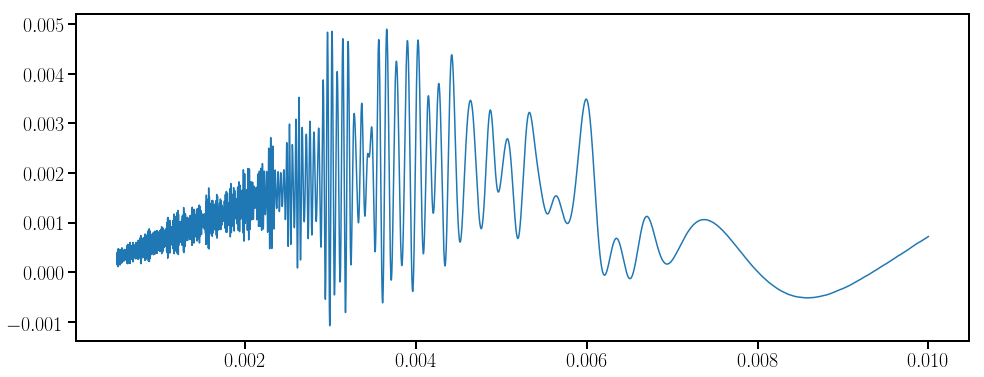

In [178]:
fig, ax1 = plt.subplots(1, figsize=(16, 6))
ax1.plot(f, eps)
#ax1.set_xscale('log')
#ax1.set_xlim(1.0e-4, 0.1)

# Plot GP functions

In [179]:
def plot_2d_func(axes, func, xlow, xhigh, nx, ylow, yhigh, ny, 
                 interpolation='bicubic', colorbar=True, colorbar_label='z'):
    """Generate a heatmap from the function func.
    """
    # Generate 2d array of z-values
    xs = np.linspace(xlow, xhigh, nx)
    ys = np.linspace(ylow, yhigh, ny)
    zgrid = np.array([[func(x, y) for y in ys] for x in xs])
    
    # Make the plot
    extent = [xs[0], xs[-1], ys[0], ys[-1]]
    im = axes.imshow(zgrid.T, interpolation=interpolation, origin='lower', 
                 extent=extent, aspect='auto')
    
    # Make the colorbar
    if colorbar:
        cb = plt.colorbar(mappable=im, ax=axes)
        cb.set_label(label=colorbar_label)
        
        
def plot_numbered_points(axes, points):
    """
    """
    for i in range(len(points)-1):
        axes.scatter(points[i, 0], points[i, 1], marker='$'+str(i)+'$', s=100, color='r')
        
    axes.scatter(points[-1, 0], points[-1, 1], marker='$'+str(len(points)-1)+'$', s=150, color='orange')

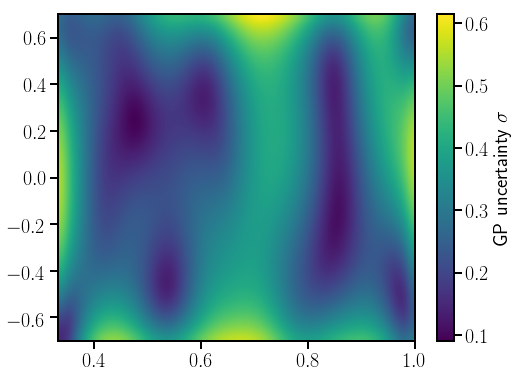

In [182]:
# print maximum_error(func, gp, limits, error_type='absolute', nsample=100000)
# print maximum_error(func, gp, limits, error_type='fractional', nsample=100000)
# print maximum_error(func, gp, limits, error_type='fractional_full_range', nsample=100000)

#x2, x3, x4 = 0.4, 5000.0, 5000.0
x0, x1, x2, x3, x4 = params_rand[i_phasemax]
def gp_predict_error(x0, x1):
    i = 19
    return dphase_gp_list[i].predict(np.array([[x0, x1, x2, x3, x4]]), return_std=True)[1][0]

fig, (ax1) = plt.subplots(1, 1, figsize=(8, 6))
xlow, xhigh, nx = limits[0, 0], limits[0, 1], 50
ylow, yhigh, ny = limits[1, 0], limits[1, 1], 50
plot_2d_func(ax1, gp_predict_error, xlow, xhigh, nx, ylow, yhigh, ny, colorbar_label=r'GP uncertainty $\sigma$')
#plot_numbered_points(ax1, points)

0.00304761357728


/Users/lackey/Library/Python/2.7/lib/python/site-packages/sklearn/gaussian_process/gpr.py:308: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/lackey/Library/Python/2.7/lib/python/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


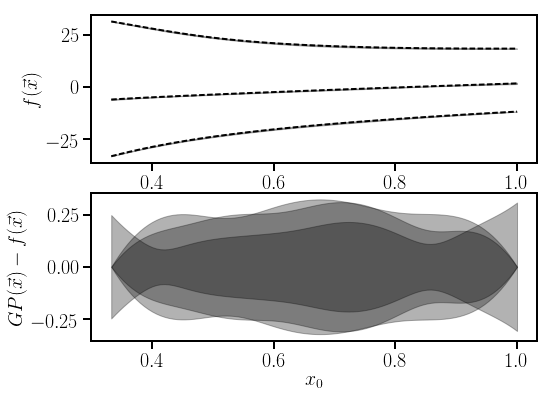

In [184]:
#x2, x3, x4 = 0.0, 2000.0, 2000.0
#x0, x1, x2, x3, x4 = params_rand[i_phasemax]
x0, x1, x2, x3, x4 = 1.0/3.0, -0.7, -0.7, 0.0, 0.0
i = 2
mf = Bphase_j.get_waveform(i, data='parameters')[0]
print mf
gp = dphase_gp_list[i]

fig, ax = plt.subplots(2, figsize=(8, 6))
for x1 in np.linspace(-0.7, 0.7, 3):
    x0s = np.linspace(1.0/3.0, 1.0, 100)
    ps = np.array([[x0, x1, x2, x3, x4] for x0 in x0s])
    
    #true = np.array([func(p) for p in ps])
    #ax[0].plot(xs, true, label=r'$x_1$='+str(x1))
    
    y_pred, ysigma = gp.predict(ps, return_std=True)
    ax[0].plot(x0s, y_pred, c='k', ls='--', lw=2)
    ax[0].fill_between(x0s, y_pred-ysigma, y_pred+ysigma, color='k', alpha=0.3)
    
    #ax[1].plot(x0s, (y_pred-true), label=r'$x_1$='+str(x1))
    ax[1].fill_between(x0s, -ysigma, ysigma, color='k', alpha=0.3)

ax[0].set_ylabel(r'$f(\vec x)$')
ax[1].set_ylabel(r'$GP(\vec x)-f(\vec x)$')
ax[1].set_xlabel(r'$x_0$')
#ax[1].set_ylim(-0.1, 0.1)
ax[0].legend(bbox_to_anchor=(1.25, 1.05))
ax[1].legend(bbox_to_anchor=(1.25, 1.05))